# CRAWLING DATA

Crawling.avif <br>
Crawling data merupakan Proses untuk mengotomatisasi untuk menjelajahi sebuah situs web untuk mengumpulkan informasi dari halaman-halaman web. proses ini oleh komputer dikenal dengan istilah *Web Crawler*. Web crawler akan memulai dengan mengunjungi sebuah halaman web, mengekstrak semua tautan di halaman tersebut, kemudian mengikuti tautan tersebut untuk mengunjungi halaman-halaman lain dan mengumpulkan data yang diperlukan.
1. **Tools Yang Biasa Digunakan :** <br>
* Web Spider
* Spider Bot
* Web Bot
* Crawler

2. **Tujuan dan Fungsi Crawling Data** <br>
* Pengindeksan oleh *Search Engine* : <br>
  *Search Engine* seperti Google menggunakan web crawler untuk mengindeks konten dari miliaran halaman web. Data yang dikumpulkan kemudian digunakan untuk membuat indeks untuk pengguna menemukan informasi secara cepat dan tepat melalui pencarian.
* Pemantauan Situs Web: <br>
  Web crawling juga digunakan untuk pemantauan perubahan pada situs web.
* Web Scrapping : <br>
  Web crawling sering digunakan sebagai langkah awal dalam proses web scraping. Crawling digunakan untuk mengunjungi halaman pada suatu situs web dan Scraping digunakan untuk mengekstrak informasi dari halaman-halaman tersebut.

# SCRAPING DATA

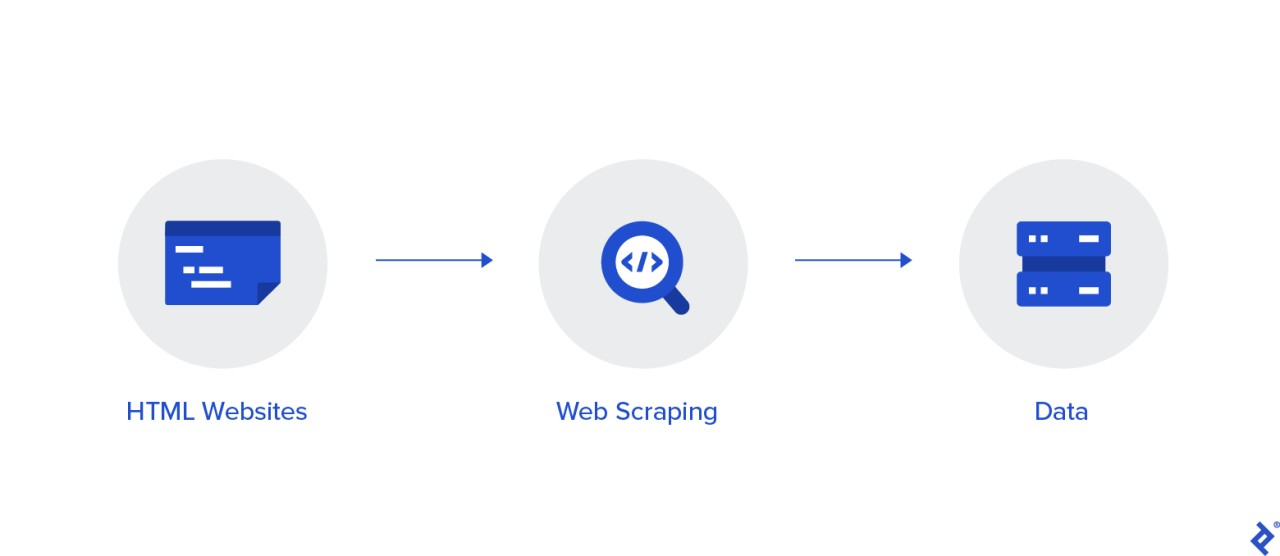 <br>

**Scraping Data** adalah sebuah teknik untuk mengambil data atau informasi tertentu dengan jumlah besar dan tujuan beragam dari suatu website. Jenis data yang diambil sangat beragam mulai dari gambar, teks, data numerik dan lain sebagainya <br>
1. **Tujuan Dari Scraping Data adalah**
* Pengumpuan data untuk analisis <br>
membantu mengumpulkan data dari berbagai sumber untuk dilakukan analisis. misalkan : mengumpulkan data untuk menganalisa pasar guna membuat rencana pemasaran dan strategi yang tepat.

* Pembuatan Dataset untuk *machine learning* <br>
mengumpulkan data yang akan digunakan dalam *machine* *Learning* dan proyek kecerdasan buatan, seperti pengenalan gambar atau analisis sentimen.

* Mengotomatiskan tugas <br>
membantu mengekstrak data dari website, sehingga perusahaan dapat menghemat waktu yang seharusnya dihabiskan untuk tugas pengumpulan data.

2. **Teknik dalam Scraping Data**
* Parsing HTML <br>
Teknik yang menggunakan analisis struktur HTML dari halaman website untuk menemukan dan mengekstrak data yang dibutuhkan. Teknik Parsing HTML umumnya menggunakan Library seperti BeautifulSoup, lxml.
* Penggunaan Xpath
Teknik yang menggunakan Request yang digunakan untuk memilih element tertentu pada halaman website dengan pola tertentu. Biasanya menggunakan library seperti selenium.
* CSS Selector
Teknik yang mirip seperti Xpath. Teknik ini merupakan cara lain untuk memilih elemen pada halaman web dengan menggunakan sintaks CSS.
* Menggunakan API (Application Programming Interface)
Teknik dengan API untuk mengakses data mereka dengan cara yang terstruktur dan terdokumentasi. beberapa website biasanya menyediakan API untuk mengambil data dengan lebih mudah dan legal.

3. **Beberapa Contoh Scraping Data**
* Detail produk E-Commerce
* Analisis Sentimen pada platform media sosial
* Headline dan Artikel
* Daftar Real Estate
* Dlsbnya.


# Perbedaan Crawling Data dan Scraping Data

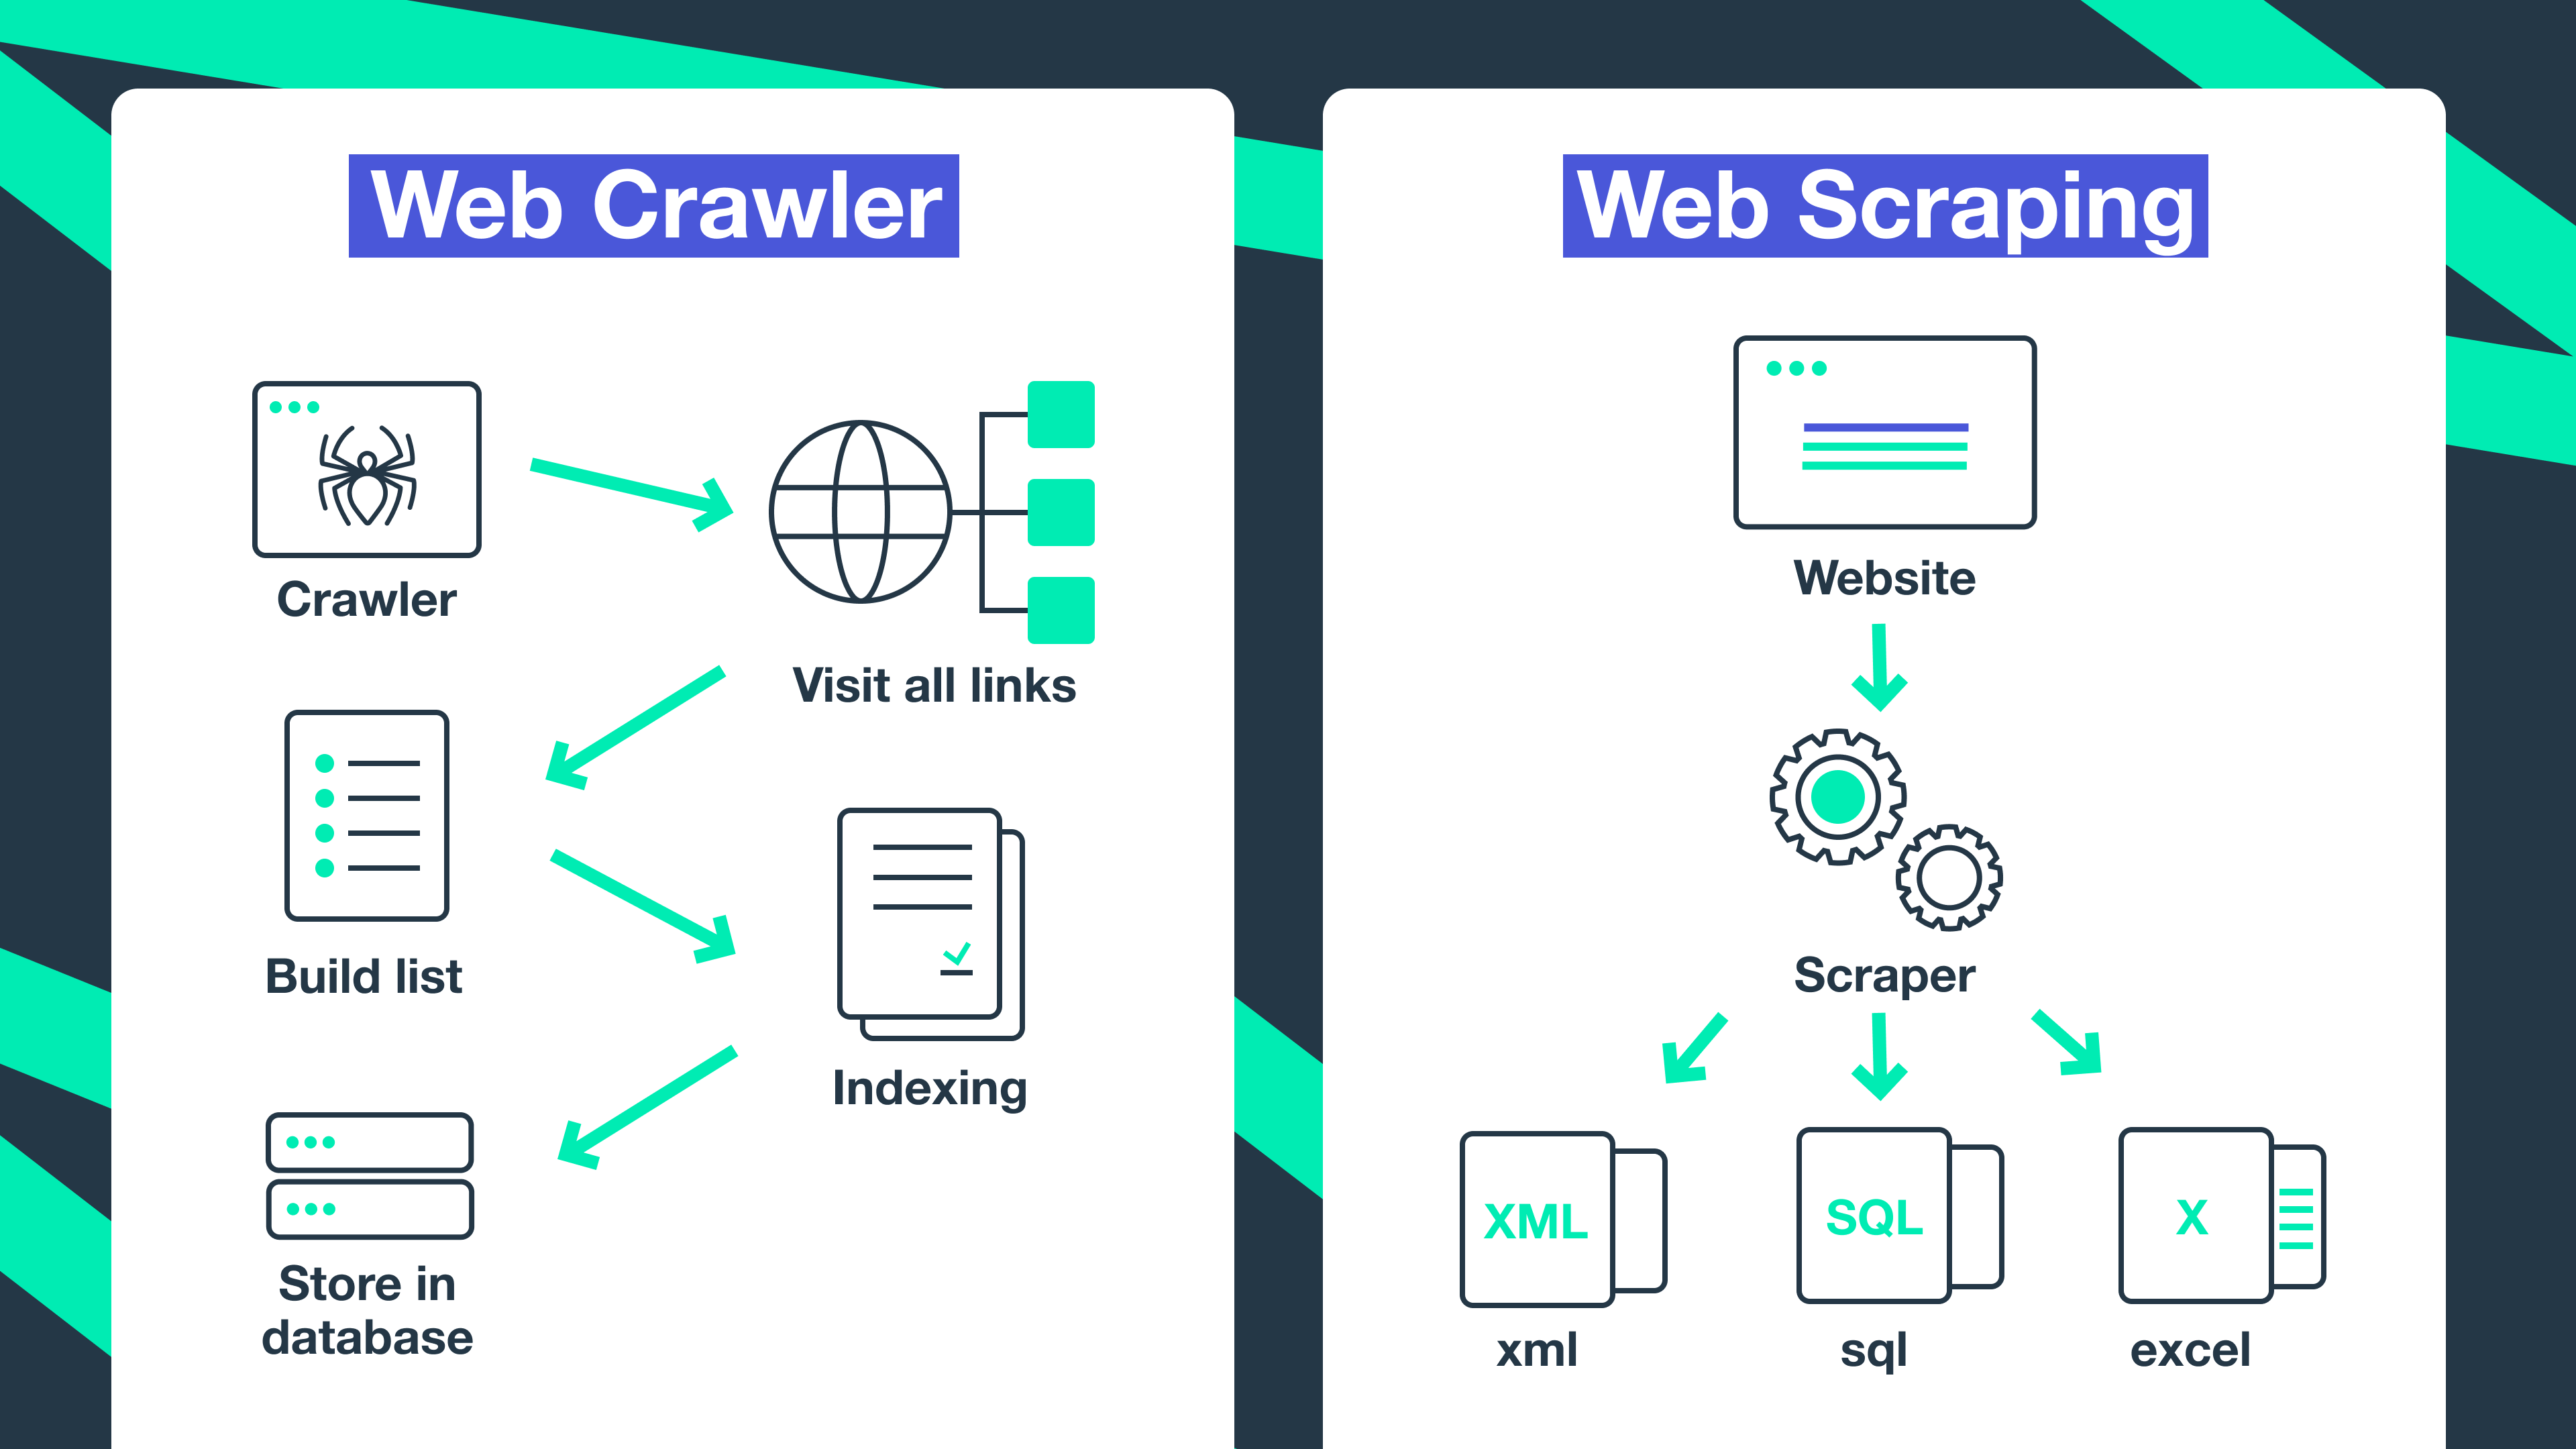  <br>
* Crawling Data : Merupakan  proses di mana crawler atau spider mengunjungi halaman-halaman web dengan tujuan untuk mengindeks konten mereka untuk mesin pencari atau untuk mengumpulkan data untuk analisis lebih lanjut. Web crawling adalah langkah pertama dalam pengumpulan data web, dan data yang dikumpulkan dapat mencakup URL halaman, konten halaman, meta informasi, tautan yang ada di halaman tersebut, dan lain sebagainya.

* Scaping Data : Merupakan proses mengambil data dari halaman web setelah halaman tersebut diakses oleh crawler atau secara langsung. Scraping berfokus pada mengekstrak konten tertentu seperti teks, gambar, audio, ulasan, dll.


# Kode untuk Crawling Data dan Scraping Data

Sumber data akan saya ambil datanya adalah : <br>
https://indeks.kompas.com/

In [2]:
# Mengimport beberapa library yang akan digunakan
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs4

Kegunaan library yang akan digunakan : <br>
* import requests : mengakses website yang akan diambil datanya
* import pandas as pd : Pengolahan Data
* import seaborn as sns : Visualisasi Data
* import matplotlib.pyplot as plt : Visualisasi Data
* from bs4 import BeautifulSoup : Mengambil Data HTML

In [3]:
# Inisialisasi URL dasar dan nomor halaman
page_number = 1
url = "https://indeks.kompas.com/?site=all&date=2024-09-02&page=" + str(page_number)

# List untuk menyimpan semua artikel
strukturartikel = []

Menginisialisasi URL yang berisi halaman situs website dari kompas pada tanggal 02-09-2024 dan page 1. membuat listkosong untuk menyimpan semua struktur yang akan di isi dari scraping data.

In [4]:
# Scrapping Berita
while page_number <= 5:
    # Request GET ke URL
    page = requests.get(url)

    # Parsing HTML
    soup = bs4(page.text, 'html.parser')
    articleItem = soup.find_all("div", {"class": "articleItem"}) #1

    # melakukan perulangan pada articleItem
    for article in articleItem: #2
        # Mengambil judul artikel
        title = article.find('h2', class_='articleTitle').get_text(strip=True)

        # Mengambil tanggal
        date = article.find('div', class_='articlePost-date').get_text(strip=True)

        # Mengambil kategori
        category = article.find('div', class_='articlePost-subtitle').get_text(strip=True).capitalize()

        # Mengambil link berita
        link = article.find('a', class_='article-link')['href']

        # Menyimpan hasil looping #3
        data = {
            'judul': title,
            'tanggal': date,
            'kategori': category,
            'link': link
        }

        # Menambahkan hasil
        strukturartikel.append(data)

    # Increment page_number
    page_number += 1

# Menampilkan hasil
strukturartikel

[{'judul': 'OJK Proyeksikan Dana Pensiun Berpotensi Capai 20 Persen dari PDB',
  'tanggal': '02/09/2024',
  'kategori': 'Money',
  'link': 'https://money.kompas.com/read/2024/09/02/235548026/ojk-proyeksikan-dana-pensiun-berpotensi-capai-20-persen-dari-pdb'},
 {'judul': 'PON 2024: Kejutan Basket Putri Jatim Kalahkan Unggulan DKI Jakarta',
  'tanggal': '02/09/2024',
  'kategori': 'Bola',
  'link': 'https://www.kompas.com/sports/read/2024/09/02/23533128/pon-2024-kejutan-basket-putri-jatim-kalahkan-unggulan-dki-jakarta'},
 {'judul': 'Syarat dan Cara Bayar Pajak Motor Online Jawa Barat',
  'tanggal': '02/09/2024',
  'kategori': 'Money',
  'link': 'https://money.kompas.com/read/2024/09/02/234800126/syarat-dan-cara-bayar-pajak-motor-online-jawa-barat'},
 {'judul': 'Kata Marc Marquez soal Insiden Kecelakaan Sang Adik Alex dengan Pecco',
  'tanggal': '02/09/2024',
  'kategori': 'Bola',
  'link': 'https://www.kompas.com/motogp/read/2024/09/02/23441258/kata-marc-marquez-soal-insiden-kecelakaan-sa

In [10]:
# jumlah artikel
print(f"Jumlah data : {len(strukturartikel)}")

Jumlah data : 200


pada code diatas, dilakukan perulangan while untuk membatasi page number kurang dari 5 halaman. page menginisialisasikan agar mengirimin permintaan get ke URL, lalu bs4(beautifulsoup) memparsing dokumen html. #1 digunakan untuk menemukan semua elemen div pada halaman web yang memiliki class *articleItem* yang diinisialisasikan dengan articleItem. #2 melakukan perulangan untuk setiap elemen didalam list untuk mengambil judul, tanggal, kategori dan link dari setiap berita pada sumber data. #3 menyimpan hasil looping kedalam dictionary. hasil dari scraping data pada website kompas pada tanggal 02-09-2024 dengan jumlah page 5 didapatkan sekitar 200 data

In [ ]:
# kategori Artikel
containers = soup.find_all("div", {"class" : "container"} )
list_artikel = []

for container in containers: # 1
    # Mencari ul dengan class 'nav__row clearfix' di container
    nav_row = container.find("ul", {"class": "nav__row clearfix"})

    if nav_row:
        # Mencari semua li dengan class 'nav__item' di dalam ul
        nav_items = nav_row.find_all("li", {"class": "nav__item"})

        for nav_item in nav_items:
            # Mencari semua a dengan class 'nav__link' di li
            nav_link = nav_item.find_all("a", {"class": "nav__link"})

            # Menambahkan setiap link ke dalam list_artikel
            for artikel in nav_link:
                list_artikel.append(artikel)

            # Mencari sub ul dengan class 'nav__sub' di li
            nav_sub = nav_item.find("ul", class_="nav__sub nav__sub--lainnya")

            if nav_sub:
                # Mencari semua li dengan class 'nav__subitem' di ul
                nav_subitems = nav_sub.find_all("li", class_="nav__subitem")

                for nav_subitem in nav_subitems:
                    # Mencari semua a dengan class 'nav__sublink' di subitem
                    sub_links = nav_subitem.find_all("a", class_="nav__sublink")

                    # Menambahkan setiap sub_link ke list_artikel
                    for sub_artikel in sub_links:
                        list_artikel.append(sub_artikel)
list_artikel

pada code diatas, untuk mendapatkan kategori artikel yang dapat didapatkan pada elemen div dengan class container yang diinisialisasikan dengan containers. #1 dilakukan perulangan setiap elemen pada containers untuk mencari elemen ul dengan class nav__row clearfix. didalam setiap ul terdapat elemen ul dengan class nav__item. kategori artikel terdapat didalam setiap li dengan elemen a dengan class nav__link. setelah mendapatkan kategori link dimasukkan pada list kosong yang telah disediakan.

In [7]:
# filter text
filter_list = [""]
kategori = []

# melakukan looping
for i in list_artikel :
  # untuk mendapatkan text pada html
  artikel = i.get_text()
  # melakukan filterisasi
  if artikel not in filter_list:
    kategori.append(artikel)
kategori

['News',
 'Pemilu',
 'IKN',
 'Tekno',
 'Otomotif',
 'Bola',
 'Lifestyle',
 'Tren',
 'Lestari',
 'Health',
 'Money',
 'Properti',
 'Food',
 'UMKM',
 'Edukasi',
 'Travel',
 'Video',
 'Hype',
 'Parapuan',
 'Kolom',
 'Sains',
 'JEO',
 'Foto',
 'VIK',
 'Homey']

In [8]:
len(kategori)

25

pada code diatas, digunakan untuk mendapatkan text dalam html dengan mengabaikan semua tag html, pada filter_list berisi stirng kosong. setelah itu dilakukan looping pada list_artikel untuk mendapatkan setiap element didalamnya lalu setiap element diambil text dengan mengabaikan semua tag html yang diinisialisasikan dengan artikel lalu dilakukan filterisasi jika pada artikel tidak terdapat pada filterlist maka dimakasukkan kedalam list ksoosng yang telah disediakan. setelah dilakukan filterisasi didapatkan hasil kategori artikel yaitu sebanyak 25 kategori

## DataFrame

### Scraping Data

In [68]:
# membuat dataframe dari data
df_scraping = pd.DataFrame(strukturartikel)
df_scraping

,judul,tanggal,kategori,link
0,OJK Proyeksikan Dana Pensiun Berpotensi Capai ...,02/09/2024,Money,https://money.kompas.com/read/2024/09/02/23554...
1,PON 2024: Kejutan Basket Putri Jatim Kalahkan ...,02/09/2024,Bola,https://www.kompas.com/sports/read/2024/09/02/...
2,Syarat dan Cara Bayar Pajak Motor Online Jawa ...,02/09/2024,Money,https://money.kompas.com/read/2024/09/02/23480...
3,Kata Marc Marquez soal Insiden Kecelakaan Sang...,02/09/2024,Bola,https://www.kompas.com/motogp/read/2024/09/02/...
4,Daftar Nama Bakal Calon Wali Kota dan Wakil Wa...,02/09/2024,News,https://megapolitan.kompas.com/read/2024/09/02...
...,...,...,...,...
195,"55 Anggota DPRD DIY Dilantik, Sultan Harap Bis...",02/09/2024,Regional,https://yogyakarta.kompas.com/read/2024/09/02/...
196,Lirik dan Chord Lagu My Best Friend - Air Supply,02/09/2024,Hype,https://www.kompas.com/hype/read/2024/09/02/21...
197,Dokter RS Pirngadi Keluhkan Pasien Meninggal k...,02/09/2024,Regional,https://medan.kompas.com/read/2024/09/02/21460...
198,Ivan Gunawan Ungkap Alasan Selalu Menangis Saa...,02/09/2024,Hype,https://www.kompas.com/hype/read/2024/09/02/21...


diatas merupakan dataframe dari hasil web scrapping yang telah dilakukan. didapatkan hasil sebanyak 200 data dengan 4 kolom yaitu : Judul Artikel, Tanggal Terbit, Kategori Artikel dan juga Link Artikel.

### Kategori

In [69]:
# membuat dataframe dari kategori
df_kategori = pd.DataFrame(kategori, columns=['kategori'])
df_kategori

,kategori
0,News
1,Pemilu
2,IKN
3,Tekno
4,Otomotif
5,Bola
6,Lifestyle
7,Tren
8,Lestari
9,Health


diatas merupakan dataframe dari kategori pencarian hasil dari webscrapping. didapatkan sebanyak 24 kategori pencarian.

In [72]:
merged_df = pd.merge(df_scraping, df_kategori, on='kategori', how='right')
merged_df

# groupby kateogri dan menghitung jumlah data
grouped_df = merged_df.groupby('kategori').size().reset_index(name='jumlah_artikel')

# Menampilkan hasil
grouped_df

,kategori,jumlah_artikel
0,Bola,15
1,Edukasi,1
2,Food,1
3,Foto,1
4,Health,5
5,Homey,1
6,Hype,25
7,IKN,1
8,JEO,1
9,Kolom,1


diatas merupakan DataFrame dari menggabungkan 2 dataframe berdasarkan kategori.

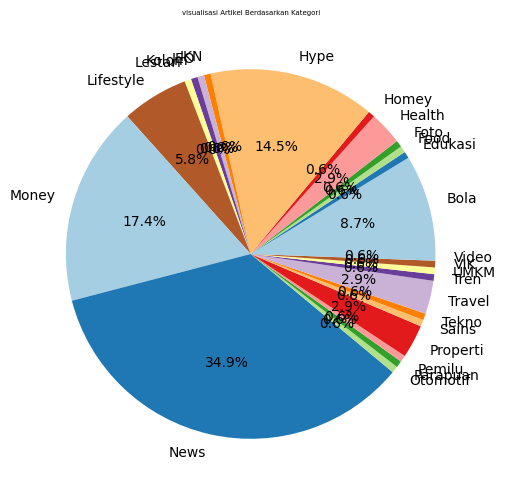

In [74]:
import matplotlib.pyplot as plt

category_counts = grouped_df.groupby('kategori')['jumlah_artikel'].sum()

plt.figure(figsize=(8, 6))
plt.pie(category_counts.values, labels=category_counts.index,autopct="%1.1f%%" ,colors=plt.cm.Paired.colors)
plt.title('visualisasi Artikel Berdasarkan Kategori', fontsize=5)
plt.show()

Diatas Merupakan Visualisasi data dengan model pie chart.